# Noise and filtering
## prep



In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

fig_size = (10, 10)



## aux functions



In [2]:


def get_image_from_url(url):
    import os
    import urllib.request
    import cv2

    file_name = os.path.basename(url)
    urllib.request.urlretrieve(url, file_name)
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


eiffel_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/461px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg'
img = get_image_from_url(eiffel_url)



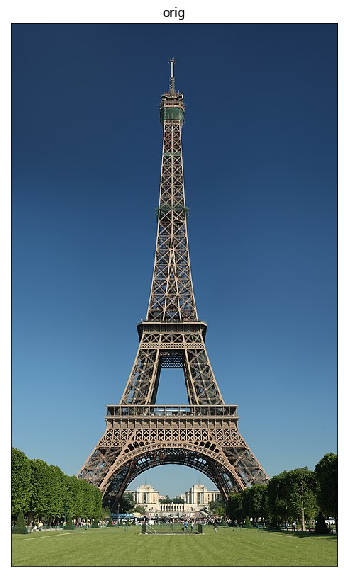

In [3]:


def plot_im(img, title):
    plt.figure(figsize=fig_size)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])


plot_im(img, "orig")



## mean filter



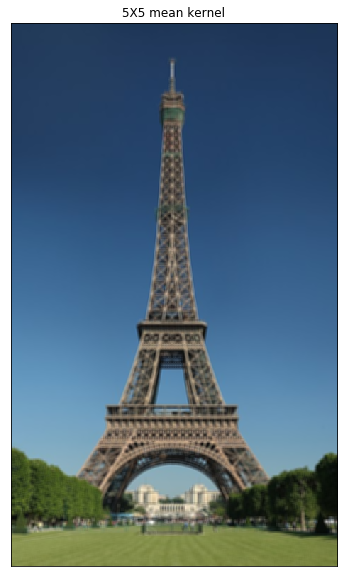

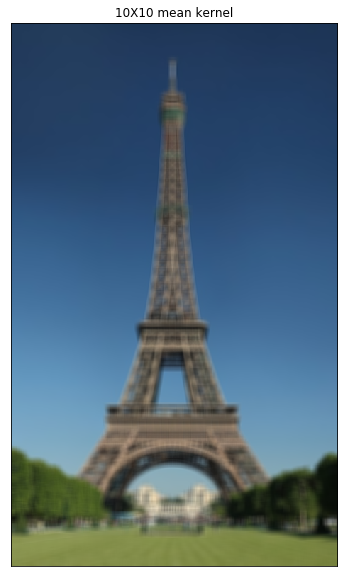

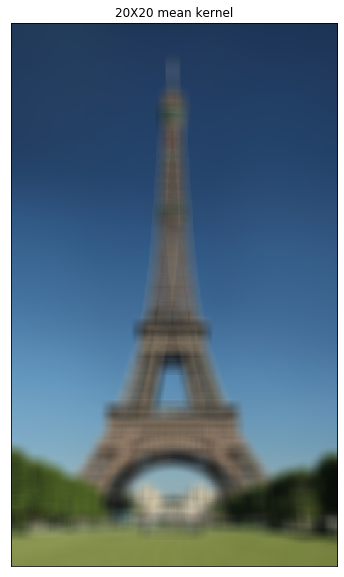

In [4]:


def mean_kernel_smoothing(img, sz):
    kernel = np.ones((sz, sz))/(sz**2)
    dst = cv2.filter2D(img, -1, kernel)

    plot_im(dst, str(sz)+'X'+str(sz)+" mean kernel")


mean_kernel_smoothing(img, 5)
mean_kernel_smoothing(img, 10)
mean_kernel_smoothing(img, 20)



## gaussian filter



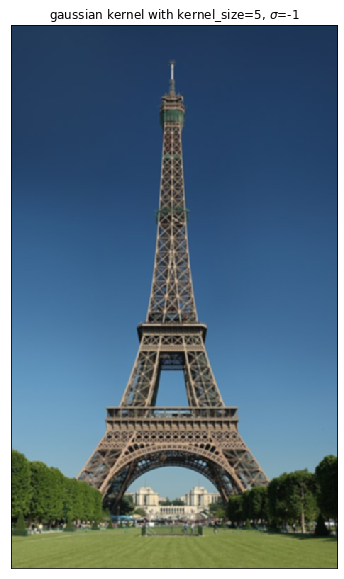

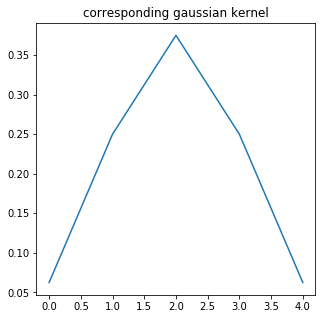

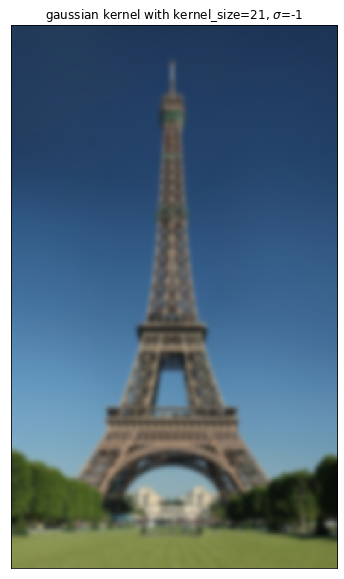

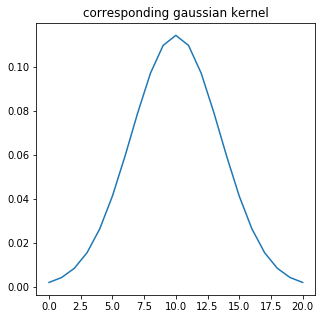

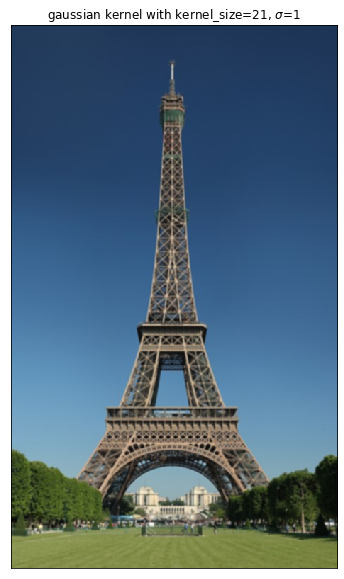

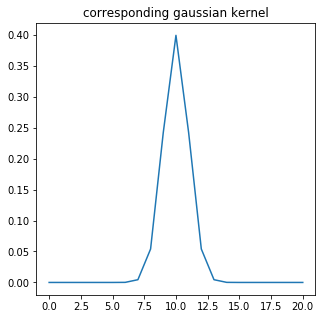

In [5]:


def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)
    plot_im(blur, "gaussian kernel with kernel_size="
            + str(k_sz)+r", $\sigma$=" + str(sigma))
    if is_plot_kernel:
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(fig_size[0]/2, fig_size[1]/2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")


gauss_blur(img, 5, is_plot_kernel=True)
gauss_blur(img, 21, is_plot_kernel=True)
gauss_blur(img, 21, 1, is_plot_kernel=True)



## madian filter



<Figure size 720x720 with 0 Axes>

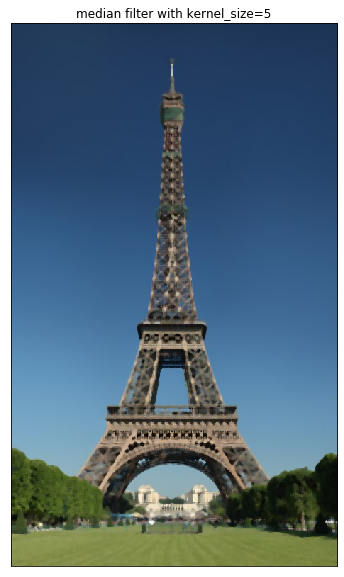

In [6]:


def median_blur(img, k_sz):
    res = cv2.medianBlur(img, k_sz)
    plt.figure(figsize=fig_size)
    plot_im(res, "median filter with kernel_size="+str(k_sz))


median_blur(img, 5)



## noise addition func



In [7]:


def noisy(noise_typ, image, gauss_var=1000, s_p_ratio=0.04):
    # modified from: https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
    if noise_typ == "gauss":
        mean = 0
        sigma = gauss_var**0.5
        gauss = np.random.normal(mean, sigma, image.shape)

        res = image + gauss
        noisy = np.uint8(res)
        return noisy
    elif noise_typ == "s&p":
        # this implementation is not entirely correct because it assumes that
        # only 0 OR 255 values are S&P noise.
        out = np.copy(image)

        # Salt mode
        mask = np.random.randint(101, size=image.shape) <= s_p_ratio*100/2
        out[mask] = 255

        # Pepper mode
        mask = np.random.randint(101, size=image.shape) <= s_p_ratio*100/2
        out[mask] = 0
        return out




## gaussian noise tests


Text(0.5, 1.0, 'original image + gaussian noise')

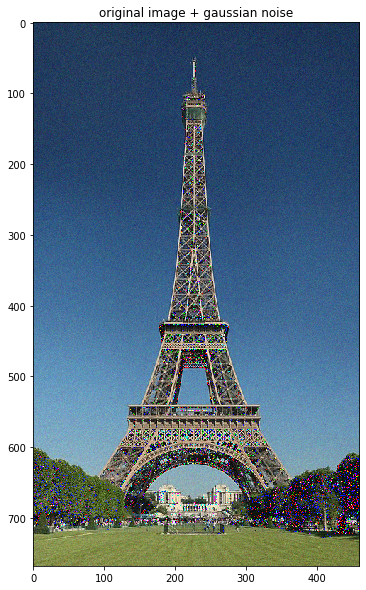

In [8]:
gauss_noise_im = noisy("gauss", img, gauss_var=70)
plt.figure(figsize=fig_size)
plt.imshow(gauss_noise_im)
plt.title('original image + gaussian noise')



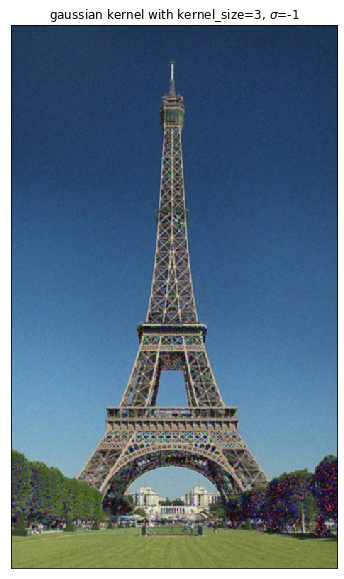

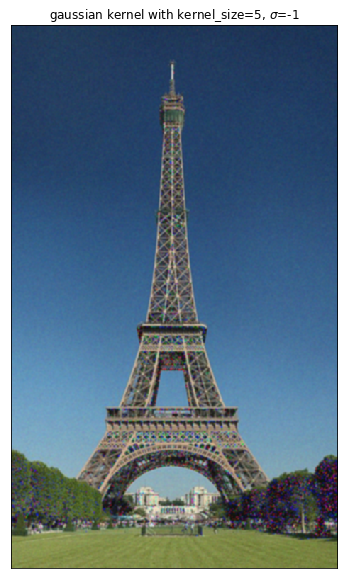

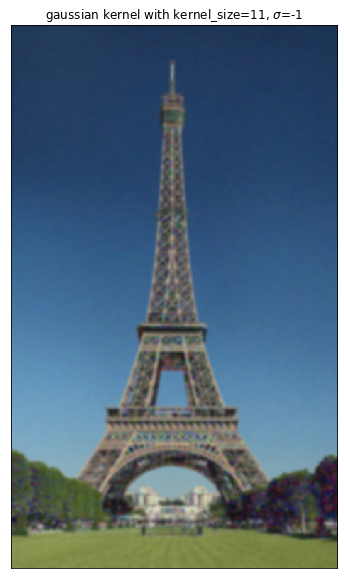

<Figure size 720x720 with 0 Axes>

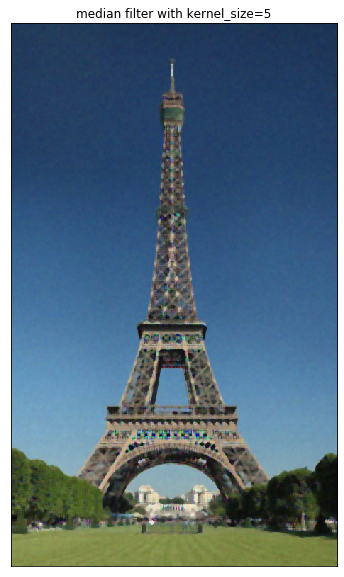

In [9]:
gauss_blur(gauss_noise_im, 3)
gauss_blur(gauss_noise_im, 5)
gauss_blur(gauss_noise_im, 11)
median_blur(gauss_noise_im, 5)



## salt and pepper noise test



Text(0.5, 1.0, 'original image + s&p noise')

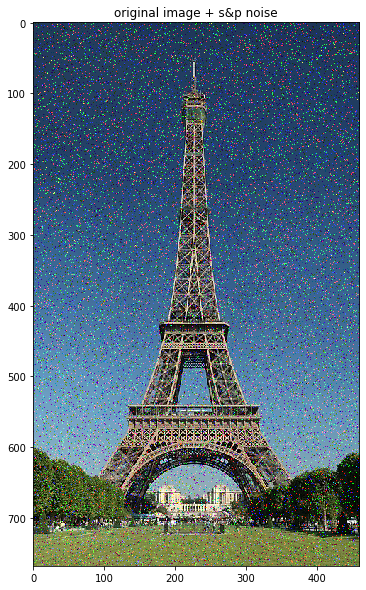

In [10]:
s_p_noise_im = noisy("s&p", img, s_p_ratio=0.04)
plt.figure(figsize=fig_size)
plt.imshow(s_p_noise_im)
plt.title('original image + s&p noise')



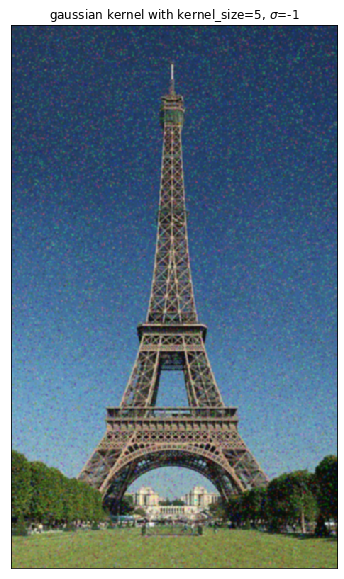

<Figure size 720x720 with 0 Axes>

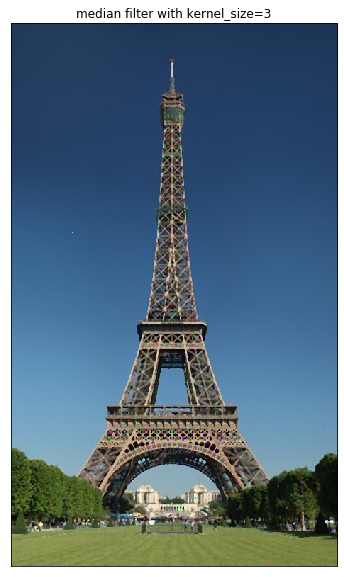

<Figure size 720x720 with 0 Axes>

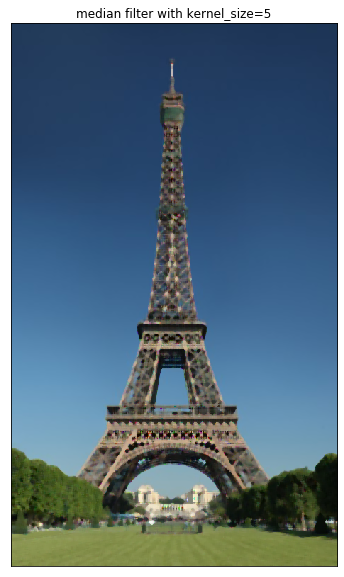

In [11]:
gauss_blur(s_p_noise_im, 5)
median_blur(s_p_noise_im, 3)
median_blur(s_p_noise_im, 5)

